# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

# Dataset filepaths




In [ ]:
class1path = r'/content/drive/MyDrive/Group05/Classification/LS_Group05/Class1.txt'
class2path =  r'/content/drive/MyDrive/Group05/Classification/LS_Group05/Class2.txt'
class3path =  r'/content/drive/MyDrive/Group05/Classification/LS_Group05/Class3.txt'

# Loading Datasets

In [ ]:
def load_data(filepath):    
    data = np.loadtxt(filepath) # Reading data from text file using numpy
    return data

In [ ]:
class1_data = load_data(class1path)
class2_data = load_data(class2path)
class3_data = load_data(class3path)

## Plots of Class data points

In [ ]:
def plot(class1,class2,class3):  
  x1 , y1 = class1[:,0] , class1[:,1]  
  x2 , y2 = class2[:,0] , class2[:,1]
  x3 , y3 = class3[:,0] , class3[:,1]
 
  c1=plt.scatter(x1, y1, color='r',edgecolors='black')
  c2=plt.scatter(x2, y2, color='g',edgecolors='black')
  c3=plt.scatter(x3, y3, color='orange',edgecolors='black')
  plt.title("Linearly Separable Input Data")
  plt.legend((c1,c2,c3),("class1","class2","class3"))
  # plt.savefig("/content/drive/MyDrive/Group05/results/input.png")

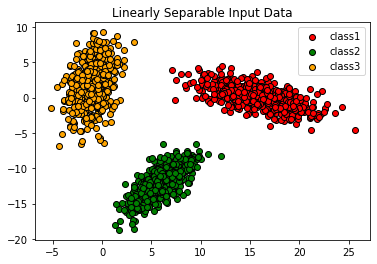

In [ ]:
  plot(class1_data,class2_data,class3_data)

## Train Test Split (70%-30%)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.7*row)
  train = data[:n]
  test = data[n:row]
  return train, test

In [ ]:
class1_train , class1_test = train_test_split(class1_data)
class2_train , class2_test = train_test_split(class2_data)
class3_train , class3_test = train_test_split(class3_data)

# Activation Function

In [ ]:
def sigmoid_af(x):
  s = 1/(1+np.exp(-(x)))
  return s

# Training

In [ ]:
def perceptron_model_train(train_data):
  N, d = train_data.shape
  theta = np.array([.2,0.1,0.3])
  epochs=100
  err = []
  avg_err = []

  while(epochs):    

    for i in range(N):
      
      x=[1,train_data[i,0], train_data[i, 1]]
      
      a=np.dot(theta.T,x) #activation value

      y_pred = sigmoid_af(a) #activation function

      if i<350:
        y_op = 0
      else:
        y_op = 1

      error = 0.5*(y_op - y_pred)**2
      eta = 0.001
      err.append(error)
      delt = eta*(y_op-y_pred)*y_pred*(1-y_pred)
      delt = np.dot(delt, x)
      theta = theta + delt

    error_avg = sum(err)/len(err)
    avg_err.append(error_avg)
    epochs = epochs-1
  return theta, avg_err


In [ ]:
class12_train = np.append(class1_train,class2_train,axis=0) #Class 1 and Class 2 Training Data
class23_train = np.append(class2_train,class3_train,axis=0) #Class 2 and Class 3 Training Data
class31_train = np.append(class3_train,class1_train,axis=0) #Class 2 and Class 1 Training Data

In [ ]:
class12_test = np.append(class1_test,class2_test,axis=0) #Class 1 and Class 2 Test Data
class23_test = np.append(class2_test,class3_test,axis=0) #Class 2 and Class 2 Test Data
class31_test = np.append(class3_test,class1_test,axis=0) #Class 3 and Class 3 Test Data

In [ ]:
theta_12, avg_err12 = perceptron_model_train(class12_train)
theta_23, avg_err23 = perceptron_model_train(class23_train)
theta_31, avg_err31 = perceptron_model_train(class31_train)

# Testing

In [ ]:
def perceptron_test_model(test_data, theta ,c1,c2):    
    N, d = test_data.shape
    y_pred_list = []

    for i in range(N):
        x = [1, test_data[i, 0], test_data[i, 1]]
        a = np.dot(theta.T, x)
        yp = sigmoid_af(a)
        if yp <=0.5:
          y_pred_list.append(c1)
        else:
          y_pred_list.append(c2)        
    return y_pred_list

In [ ]:
def get_max_min(c1,c2,c3): # function to get min max data_points from dataset
  xmax = int(max([max(c1[0]), max(c2[0]), max(c3[0])]))
  ymax = int(max([max(c1[1]), max(c2[1]), max(c3[1])]))
  xmin = int(min([min(c1[0]), min(c2[0]), min(c3[0])]))
  ymin = int(min([min(c1[1]), min(c2[1]), min(c3[1])]))
  return xmax , ymax , xmin , ymin


In [ ]:
xmax , ymax , xmin , ymin = get_max_min(class1_data,class2_data, class3_data)

points = []
for i in range(xmin-5, xmax+15):
    for j in range(ymin-7, ymax-5):
        points.append([i, j])
points=np.array(points) 


# Decision Region Plot

In [ ]:
def decision_region_plot(train_data,theta,c1,c2):
  x1 , y1 , x2 , y2 , cls1 , cls2 = [] , [] , [] , [] , [] , []
  
  y_pred = perceptron_test_model(points, theta ,c1,c2)
  N, d = points.shape
  for i in range(N):
      if y_pred[i] == c1:
          x1.append(points[i, 0])
          y1.append(points[i, 1])
          cls1.append((points[i, 0],points[i, 1]))
      else:
          x2.append(points[i, 0])
          y2.append(points[i, 1])
          cls2.append((points[i, 0],points[i, 1]))

  plt.scatter(x1, y1, marker='s', s=500, color='pink')
  plt.scatter(x2, y2, marker='s', s=500, color='yellow')
  plt.legend(['Class '+ str(c1),'Class '+ str(c2)])
  plt.scatter(train_data[:,:1], train_data[:,1:2],edgecolors='black')

  plt.title("Decision Region Plot for Class "+str(c1)+" and " + str(c2))
  plt.tight_layout()
  # plt.savefig("/content/drive/MyDrive/Group05/results/DRP_Class"+str(c1)+str(c2)+".png")
  plt.show()

  return [cls1,cls2]

In [ ]:
def Error_vs_Epoch_Plot(a1,a2,a3):
  plt.plot(a1)
  plt.plot(a2)
  plt.plot(a3)
  plt.legend(['Class 12 Model','Class 23 Model', 'Class 31 Model'])
  plt.title("Average Error vs Epoch ")
  plt.xlabel("Epochs")
  plt.ylabel("Average Error")
  plt.savefig("/content/drive/MyDrive/Group05/results/avgErrorvsEpoch.png")
  plt.show()


# Results observed

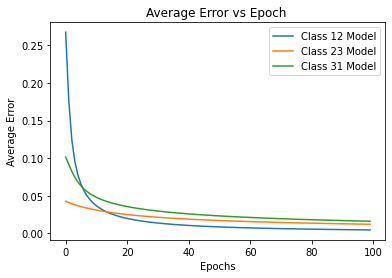

In [ ]:
Error_vs_Epoch_Plot(avg_err12,avg_err23,avg_err31)

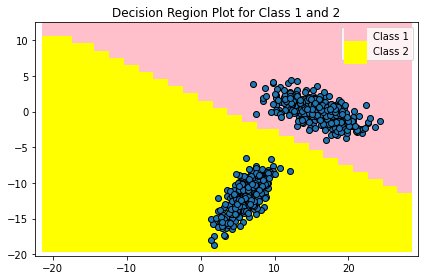

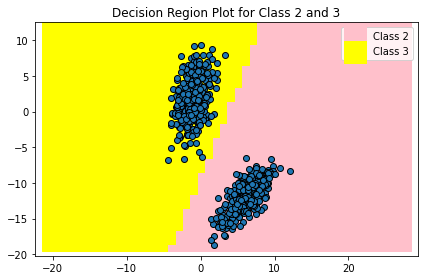

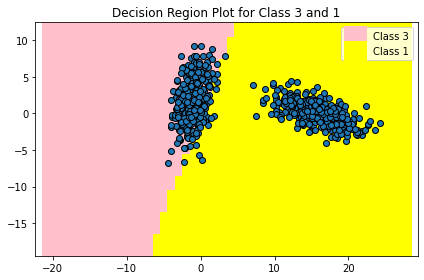

In [ ]:
c12 = decision_region_plot(class12_train,theta_12,1,2)
c23= decision_region_plot(class23_train,theta_23,2,3)
c31= decision_region_plot(class31_train,theta_31,3,1)

In [ ]:
c1 = list(set.intersection(set(c12[0]), set(c31[1])))
c2 = list(set.intersection(set(c12[1]), set(c23[0])))
c3 = list(set.intersection(set(c31[0]), set(c23[1])))

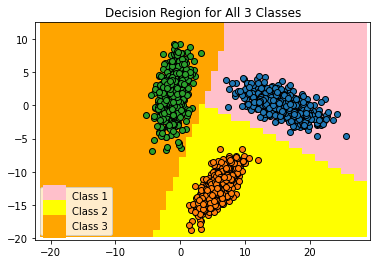

In [ ]:
c1x, c1y = [i[0] for i in c1], [i[1] for i in c1]
c2x, c2y = [i[0] for i in c2], [i[1] for i in c2]
c3x, c3y = [i[0] for i in c3], [i[1] for i in c3]

plt.scatter(c1x, c1y, marker='s', s=500,color='pink')
plt.scatter(c2x, c2y, marker='s', s=500,color='yellow')
plt.scatter(c3x, c3y, marker='s', s=500,color='orange')


plt.scatter(class1_data[:,0], class1_data[:,1], edgecolors='black')
plt.scatter(class2_data[:,0], class2_data[:,1], edgecolors='black')
plt.scatter(class3_data[:,0], class3_data[:,1], edgecolors='black')
plt.legend(['Class 1','Class 2','Class 3'])
plt.title("Decision Region for All 3 Classes")

# plt.savefig("/content/drive/MyDrive/Group05/results/decisionboundary.png")

plt.show()

## Confusion Matrix and Accuracy

In [ ]:
def confusion(test_data,theta,c1,c2):
  y1,y2=np.empty(150),np.empty(150)
  y1.fill(c1)
  y2.fill(c2)
  y_true=np.append(y1,y2)
  y_pred= perceptron_test_model(test_data,theta,c1,c2)
  print(confusion_matrix(y_true,y_pred))
  return y_true,y_pred

In [ ]:
y_true12,y_pred12=confusion(class12_test,theta_12,1,2)

[[150   0]
 [  0 150]]


In [ ]:
y_true23,y_pred23=confusion(class23_test,theta_23,2,3)

[[150   0]
 [  2 148]]


In [ ]:
y_true31,y_pred31=confusion(class31_test,theta_31,3,1)

[[150   0]
 [  6 144]]


In [ ]:
y_pred = np.append(y_pred12,y_pred23)
y_pred = np.append(y_pred,y_pred31)
y_true = np.append(y_true12,y_true23)
y_true = np.append(y_true,y_true31)
print(confusion_matrix(y_true,y_pred))


[[300   0   0]
 [  0 300   0]
 [  6   2 292]]


# Accuracy

In [ ]:
print("ACCURACY OF LINEARLY SEPARABLE DATA: ",accuracy_score(y_true, y_pred))

ACCURACY OF LINEARLY SEPARABLE DATA:  0.9911111111111112


# Classification Report

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99       300
         2.0       0.99      1.00      1.00       300
         3.0       1.00      0.97      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

